In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fsize = (15, 4)


def make_plots(temp, F, S, C):
    plt.figure(figsize=fsize)


    plt.subplot(1, 3, 1)
    plt.plot(temp, F)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Temperature")
    plt.ylabel("Free energy")
    plt.grid()

    plt.subplot(1, 3, 2)
    plt.plot(temp, S)
    plt.xscale("log")
    plt.xlabel("Temperature")
    plt.ylabel("Entropy")
    plt.grid()

    plt.subplot(1, 3, 3)
    plt.plot(temp, C)
    plt.xscale("log")
    plt.xlabel("Temperature")
    plt.ylabel("Heat Capacity")
    plt.grid()


    plt.tight_layout()
    plt.show()

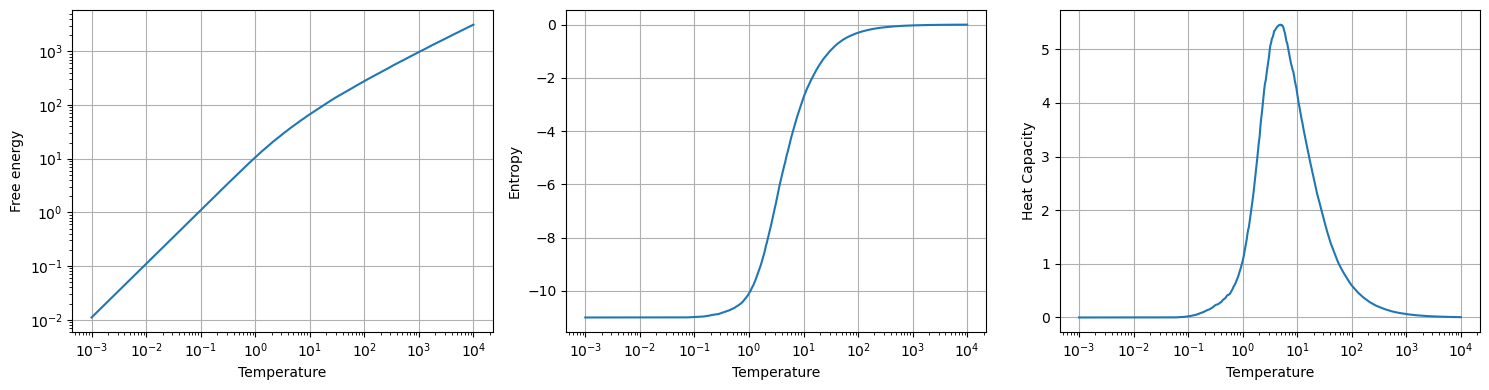

In [3]:
forward_file = np.load("results/mnist_forward_stats.npz")

temp_for = forward_file["temp"]
log_Z_for = forward_file["log_Z"]
U_for = forward_file["U"]
full_U_for = forward_file["full_U"]
var_H_for = forward_file["var_H"]

F_for = -temp_for * log_Z_for
S_for = log_Z_for + U_for / temp_for
C_for = var_H_for / temp_for ** 2


make_plots(temp_for, F_for, S_for, C_for)

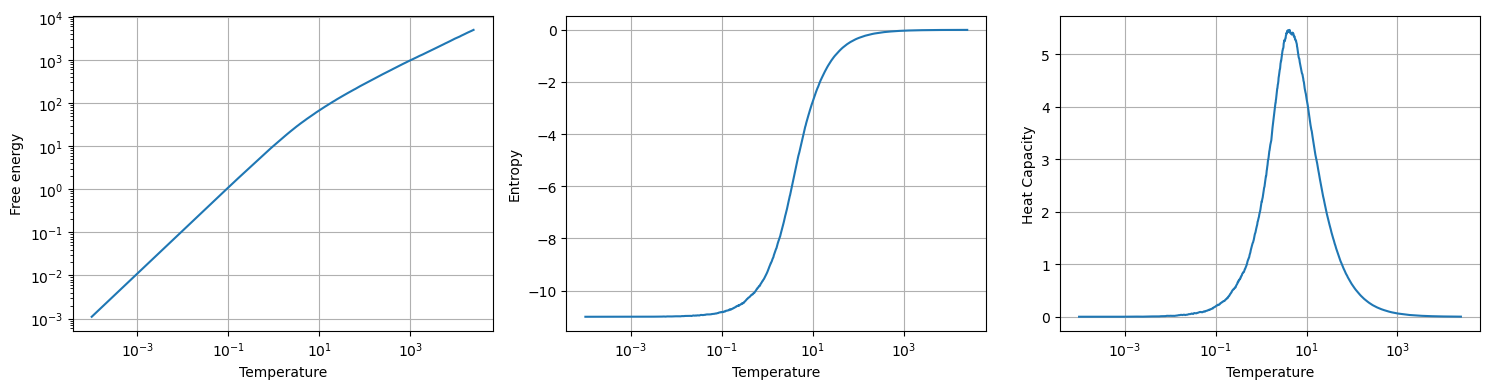

In [4]:
backward_file = np.load("results/mnist_backward_stats.npz")

temp_back = backward_file["temp"]
log_Z_back = backward_file["log_Z"]
U_back = backward_file["U"]
full_U_back = backward_file["full_U"]
var_H_back = backward_file["var_H"]

F_back = -temp_back * log_Z_back
S_back = log_Z_back + U_back / temp_back
C_back = var_H_back / temp_back ** 2


make_plots(temp_back, F_back, S_back, C_back)

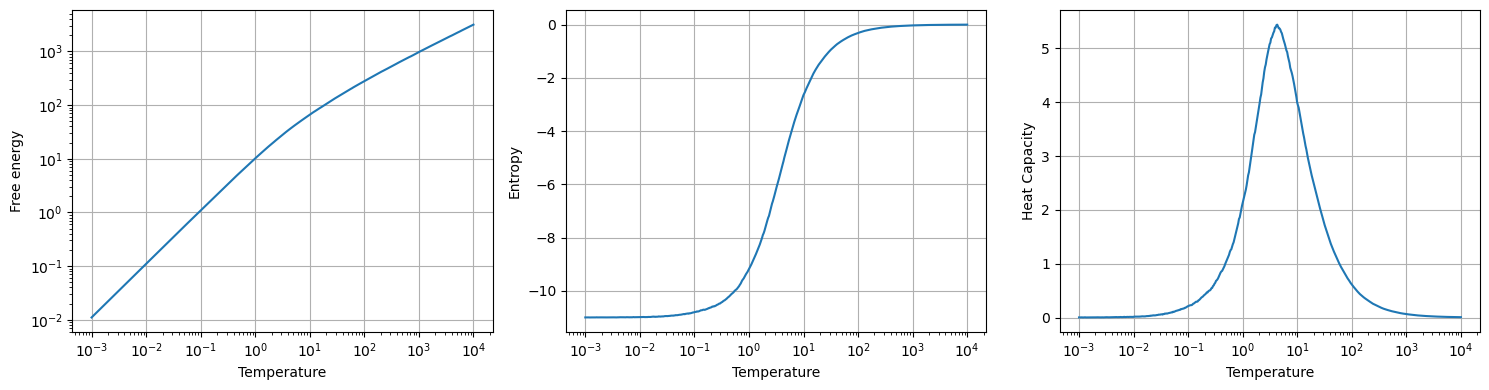

In [5]:
forward_unbiased_file = np.load("results/mnist_forward_unbiased_stats.npz")

temp_for_u = forward_unbiased_file["temp"]
log_Z_for_u = forward_unbiased_file["log_Z"]
U_for_u = forward_unbiased_file["U"]
full_U_for_u = forward_unbiased_file["full_U"]
var_H_for_u = forward_unbiased_file["var_H"]

F_for_u = -temp_for_u * log_Z_for_u
S_for_u = log_Z_for_u + U_for_u / temp_for_u
C_for_u = var_H_for_u / temp_for_u ** 2


make_plots(temp_for_u, F_for_u, S_for_u, C_for_u)

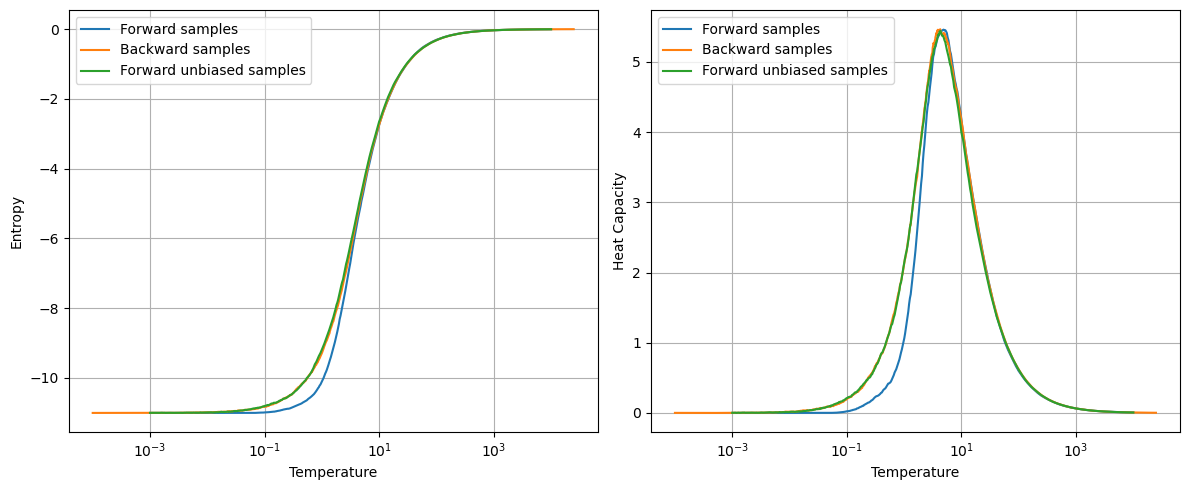

In [6]:
plt.figure(figsize=(12, 5))


# plt.subplot(1, 3, 1)
# plt.plot(temp_for, F_for, label="Forward samples")
# plt.plot(temp_back, F_back, label="Backward samples")
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("Temperature")
# plt.ylabel("Free energy")
# plt.legend()
# plt.grid()

plt.subplot(1, 2, 1)
plt.plot(temp_for, S_for, label="Forward samples")
plt.plot(temp_back, S_back, label="Backward samples")
plt.plot(temp_for, S_for_u, label="Forward unbiased samples")
plt.xscale("log")
plt.xlabel("Temperature")
plt.ylabel("Entropy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(temp_for, C_for, label="Forward samples")
plt.plot(temp_back, C_back, label="Backward samples")
plt.plot(temp_for, C_for_u, label="Forward unbiased samples")
plt.xscale("log")
plt.xlabel("Temperature")
plt.ylabel("Heat Capacity")
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

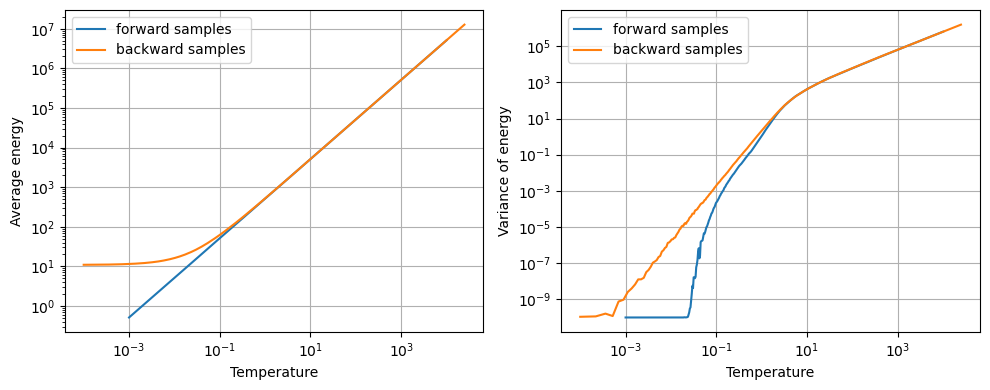

In [7]:
plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.plot(temp_for, full_U_for, label="forward samples")
plt.plot(temp_back, full_U_back, label="backward samples")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Temperature")
plt.ylabel("Average energy")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(temp_for, var_H_for + 1e-10, label="forward samples")
plt.plot(temp_back, var_H_back + 1e-10, label="backward samples")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Temperature")
plt.ylabel("Variance of energy")
plt.grid()
plt.legend()


plt.tight_layout()
plt.show()